In [74]:
#importing necessary pacakages
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

In [75]:
image_url = 'https://raw.githubusercontent.com/zhreshold/mxnet-ssd/master/data/demo/dog.jpg'
image_filepath = 'dog.jpg'
gcv.utils.download(url=image_url,path = image_filepath)
#image_filepath = 'developer.png'

'dog.jpg'

In [76]:
image = mx.image.imread(image_filepath)
print('shape:',image.shape)
print('datatype :',image.dtype)
print('minimum value :',image.min().asscalar())
print('maximum value :',image.max().asscalar())

shape: (576, 768, 3)
datatype : <class 'numpy.uint8'>
minimum value : 0
maximum value : 255


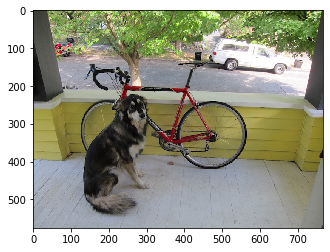

In [77]:
plt.imshow(image.asnumpy())

In [78]:
#visualize image
#transform and batch image
image,chw_image=gcv.data.transforms.presets.yolo.transform_test(image,short=512)
print('shape:',image.shape)
print('datatype :',image.dtype)
print('minimum value :',image.min().asscalar())
print('maximum value :',image.max().asscalar())

shape: (1, 3, 512, 683)
datatype : <class 'numpy.float32'>
minimum value : -2.117904
maximum value : 2.64


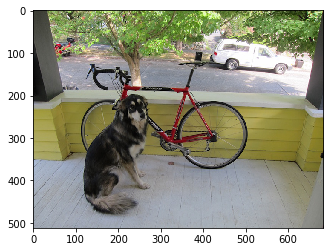

In [79]:
plt.imshow(chw_image)

In [80]:
#loading pretrained models 
network = gcv.model_zoo.get_model('yolo3_darknet53_coco',pretrained = True)

In [81]:
#make prediction
prediction = network(image)

In [82]:
type(prediction)

tuple

In [83]:
#looping through tuples
for index,array in enumerate(prediction):
    print('#{} shape: {} '.format(index +1,array.shape))

#1 shape: (1, 100, 1) 
#2 shape: (1, 100, 1) 
#3 shape: (1, 100, 4) 


In [84]:
#unpack prediction
prediction = [array[0] for array in prediction]

In [85]:
class_indicies,probabilities,bounding_boxes = prediction

In [86]:
#object classes
k=10
print(class_indicies[:k])


[[16.]
 [ 1.]
 [ 7.]
 [ 2.]
 [13.]
 [ 0.]
 [58.]
 [-1.]
 [-1.]
 [-1.]]
<NDArray 10x1 @cpu(0)>


In [87]:
network.classes

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [88]:
class_index = 16
assert class_index>-1
print(network.classes[class_index])

dog


In [89]:
#object probabilities
print(probabilities[:k])


[[ 0.9922735 ]
 [ 0.9646552 ]
 [ 0.6890209 ]
 [ 0.23493634]
 [ 0.01805799]
 [ 0.01063591]
 [ 0.01027783]
 [-1.        ]
 [-1.        ]
 [-1.        ]]
<NDArray 10x1 @cpu(0)>


In [90]:
#Object bounding boxes
print(bounding_boxes[:k])


[[116.383095 201.52261  281.88876  482.33267 ]
 [ 94.03961  107.238846 504.9234   376.52264 ]
 [417.18365   69.68815  614.6805   149.04834 ]
 [417.18365   69.68815  614.6805   149.04834 ]
 [ 91.044464 124.7944   504.3832   403.5773  ]
 [532.793     92.20426  547.2879   104.81126 ]
 [ 51.13082   68.555534  95.09498  111.6173  ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]]
<NDArray 10x4 @cpu(0)>


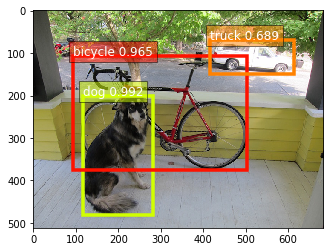

In [91]:
#vizualise predictions
gcv.utils.viz.plot_bbox(chw_image,
                        bounding_boxes,
                        probabilities,
                        class_indicies,
                        class_names=network.classes)